In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *

In [2]:

# df = pd.read_csv('../(Data) Last Year/training/prices_round_1_day_0.csv', delimiter=';')
df = pd.read_csv('verify2.csv', delimiter=';')
df.fillna(0, inplace=True)

In [3]:
def find_bid_volume(row):
    return sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3']])

In [4]:
def find_ask_volume(row):
    return sum([row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])

In [5]:
def diff_vol(row):
    return find_bid_volume(row) - find_ask_volume(row) + row["mid_price"]

In [6]:
df['order_bal'] = df.apply(diff_vol, axis=1)

In [35]:
# tkaing the weighted last 10 points and calculating orderbook inbalnace avg

def avg_inbalance():
    df["starfruit_ewm_orderbal"] = df[df['product'] == "STARFRUIT"]['order_bal'].ewm(span = 5, adjust = False).mean()

    success = 0
    ddf = df[df['product'] == "STARFRUIT"]
    print(ddf.columns.to_list())
    for index, row in ddf.iterrows():
        if index == 2000:
            break
        curr_pred = row["starfruit_ewm_orderbal"]
        next_pred = ddf.iloc[index + 1]["mid_price"]

        # we expect the next mid price to go up
        exp = curr_pred - row["mid_price"]
        res = next_pred - row["mid_price"]

        if exp > 0 and res > 0:
            success += 1

        if exp < 0 and res < 0:
            success += 1

    return success
print(avg_inbalance())

# df


['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss', 'order_bal', 'starfruit_ewm_orderbal']
506


In [ ]:
df

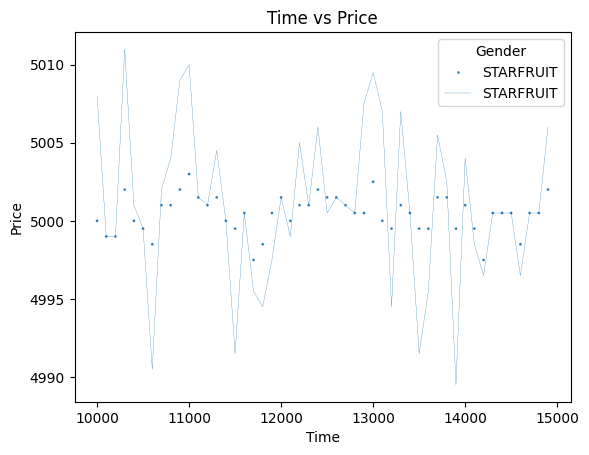

In [9]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[100:150], x='timestamp', y='mid_price', hue='product', s = 4, color="red")

sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[100:150], x='timestamp', y='order_bal', hue='product', linewidth=0.2)

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Time vs Price")

# Show plot
plt.legend(title='Gender')
plt.show()